# Lab 3 Part 1: Convolutions in Keras
The code below will allow you to play with a single convolutional layer in Keras. Take a look at the documentation for the Conv2D layer, which is also where the original code came from.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

In [2]:
input_shape = (4, 28, 28, 3)

x = tf.random.normal(input_shape)

y = Conv2D(filters=2,
           kernel_size=(3, 3),
           strides=1,
           padding='valid',
           input_shape=(None, 28, 28, 3))(x)
y.shape

TensorShape([4, 26, 26, 2])

Here is a brief explanation of the above code:

<img src="Convolution_notebook-2.jpeg" width="600" style="transform: rotate(90);">

# Exercises
In the code above, make changes to:

- input  ℎ
- input  𝑤
- input  𝑛𝑐
- number of filters
- kernel size (same as filter size)

For each change, calculate the dimensions of the output (y.shape) by hand, including drawing a diagram (as shown below).



In [3]:
input_shape = (4, 36, 36, 2)

x = tf.random.normal(input_shape)

y = Conv2D(filters=4,
           kernel_size=(4, 4),
           strides=1,
           padding='valid',
           input_shape=(None, 36, 36, 2))(x)
y.shape


TensorShape([4, 33, 33, 4])

<img src="Ml lab 3 submission image.jpeg" width=600 align="center">

## MNIST Revisited

Let's now revisit our MNIST. Knowing that the data contains 2-dimensional images of handwritten digits, we should be able to apply what we've learned about convolutions. Thus, in this section, we will create a convolutional neural network (CNN or convnet) for this data set.

In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [5]:
train_data[0].shape

(28, 28)

In [6]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

This time we are going to use a **validation set** to monitor our training progress. We can also use this validation set for *hyperparameter tuning*. Remember, using the validation set allows us to keep the *test set* to gauge how well our final model should do in the real world; that is, the final model only sees the test data once.

In [1]:
# Use the first 10,000 samples of our training data as our validation set
val_data = train_data[:10000]
val_labels = train_labels[:10000]

# Use the remainder of the original training data for actual training
partial_train_data = train_data[10000:]
partial_train_labels = train_labels[10000:]

NameError: name 'train_data' is not defined

In [8]:
# Scale the pixel values so they lie in the range of 0-1
partial_train_data = partial_train_data / 255.
val_data = val_data / 255.

test_data = test_data /255.

Note that our data currently has 3 dimensions: `(samples, height, width)`.

In [9]:
print(partial_train_data.shape)
print(val_data.shape)
print(test_data.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


In [10]:
print(partial_train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

(50000,)
(10000,)
(10000,)


Our convolutional neural network will expect 4-dimensional data: `(batch_size, height, width, channels)`. Note that depending on how you decide to update the parameters of the network, `batch_size` could equal the number of `samples` (as in *batch gradient descent*), or it could equal a single sample (as in *stochastic gradient descent*, or it can equal the batch size (as in *mini-batch gradient descent*).

We can use a NumPy function to add this dimension.

In [11]:
partial_train_data = np.expand_dims(partial_train_data, axis=3)
val_data = np.expand_dims(val_data, axis=3)
test_data = np.expand_dims(test_data, axis=3)

In [12]:
print(partial_train_data.shape)
print(val_data.shape)
print(test_data.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


Note how a fourth dimension was added to our data. This dimension corresponds to the number of channels in our input data. Here it is 1, since the images are all greyscale. It would be 3 if the images were RGB. Also note, that the convention here is *channels last*, as opposed to *channels first*.

As in Lab 1, we need to convert our label data to the correct format.

In [13]:
from tensorflow.keras.utils import to_categorical

partial_train_labels = to_categorical(partial_train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

In [14]:
print(partial_train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)
(10000, 10)


We will now import the necessary modules for building our convolutional neural network. Since we are using Keras's sequential API we need to import the `Sequential` module. The remaining 3 imports will help us build the layers of our CNN. `Conv2D` creates the convolutional layers we have been discussing in the lectures. `Flatten` is used to create a 1 dimensional vector so we can feed the output of our convolutional layers to the fully-connected layers. We used NumPy's `reshape` function to do this flattening in Lab 1. And the `Dense` layer is the same as what we used in Lab 1.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

We are going to use a slightly different approach to building our network than we did in Lab 1. Here we will directly add a *list of layers* to the `Sequential()` object. That is, we put all our layers inside square brackets `[...]` and put this inside the `Sequential( [...] )` object to create our model. In Lab 1 we used the `.add()` method to add individual layers to our `Sequential()` object that we initialized without any layers.

In [33]:
model = Sequential([
    Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=1,
           padding='same',
           activation='relu',
           input_shape=(28, 28, 1)),
    Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=2,
           padding='valid',
           activation='relu'),
    Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=1,
           padding='same',
          activation='relu'),
    Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=1,
           padding='valid',
           activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

It is often helpful to see the tensor shapes and number of parameters per layer. We can get this information by using the `.summary()` method.

In [34]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 7744)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               991360    
                                                                 
 dense_5 (Dense)             (None, 10)               

We are still tackling the same type of problem (multi-class classification) so the same loss and metrics will work for us here. The optimizer `rmsprop` is the same as we used before and can be taken as the default method (or recipe) to try out for updating the model parameters.

In [18]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

We now fit our model to the remaining training data (the original training data minus the validation data). You will now see that *loss* and *accuracy* get updated for each batch of images (here set to 256) but the *validation loss* and *validation accuracy* get updated after each *epoch*. Note that the *validation data* is not being used to train the model. Each batch of the training data is used to update the parameters and then, once we have gone through all of the samples in our training data (that is, all the samples in `partial_train_data`) the model is used to make predictions for the validation set. From those predictions the validation loss and accuracy are calculated.

Each epoch of training should take 30-50s to complete.

In [19]:
history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=10,
                    batch_size=256,
                    validation_data=(val_data, val_labels),
                    verbose=1)

Epoch 1/10
196/196 [==============================] - 60s 291ms/step - loss: 0.3015 - accuracy: 0.9048 - val_loss: 0.1058 - val_accuracy: 0.9682
Epoch 2/10
196/196 [==============================] - 56s 285ms/step - loss: 0.0563 - accuracy: 0.9822 - val_loss: 0.1085 - val_accuracy: 0.9677
Epoch 3/10
196/196 [==============================] - 55s 279ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0628 - val_accuracy: 0.9832
Epoch 4/10
196/196 [==============================] - 60s 308ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0482 - val_accuracy: 0.9847
Epoch 5/10
196/196 [==============================] - 63s 320ms/step - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.0603 - val_accuracy: 0.9868
Epoch 6/10
196/196 [==============================] - 59s 302ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0551 - val_accuracy: 0.9868
Epoch 7/10
196/196 [==============================] - 59s 300ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0532 - val_ac

The values for the training loss and accuracy, as well as the validation loss and accuracy, are stored in the `history` variable. You can see the structure of the dictionary that stores this information as follows:

In [20]:
history.history['loss']

[0.30153658986091614,
 0.056304171681404114,
 0.03321387246251106,
 0.022904783487319946,
 0.015124622732400894,
 0.010887392796576023,
 0.008544424548745155,
 0.005580858793109655,
 0.004962155595421791,
 0.004698625300079584]

We will now use this information to visualize the progress our network makes on the loss and accuracy as the number of epochs increases.

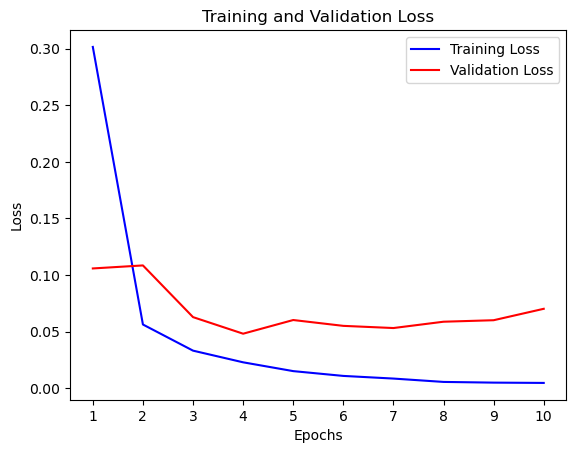

In [21]:
import matplotlib.pyplot as plt  # needed to create our plot

history_dict = history.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

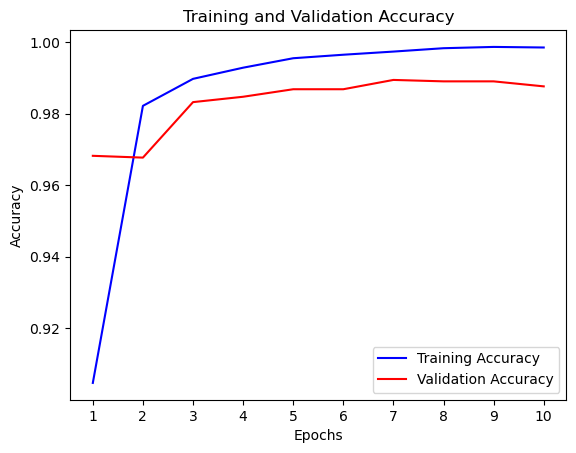

In [22]:
# As above, but this time we want to visualize the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Exercise: Change the layers

Play around with the **number of filters** and the **filter size** in our model. Note the change in:
- number of parameters in the model
- training and validation losses and accuracies

### Exercise: Early Stopping

When you have a final model, train it until the validation loss stops decreasing. At this point, the model will have stopped learning and will start to memorize the training data. The model may be starting to overfit. Note the number of epochs at which this happens.  One way to avoid this overfitting is called *early stopping*.  

Try implementing early stopping for our model:
- use the validation loss plot to determine which epoch corresponds to when the model stops learning
    - if it so happens that the validation loss continues going down for all 10 epochs, then increase the number of epochs in the original code to 20
- use the complete training set (no validation set)
- scale this training set
- expand its dimensions to 4
- use the same model, and same optimizer, loss and metrics
- fit the model to the complete training set (no validation set)
- evaluate the trained model on the test data


In [23]:
model2 = Sequential([
    Conv2D(filters=64,
           kernel_size=(2, 2),
           strides=1,
           padding='same',
           activation='relu',
           input_shape=(28, 28, 1)),
    Conv2D(filters=64,
           kernel_size=(2, 2),
           strides=2,
           padding='valid',
           activation='relu'),
    Conv2D(filters=128,
           kernel_size=(2, 2),
           strides=1,
           padding='same',
          activation='relu'),
    Conv2D(filters=128,
           kernel_size=(2, 2),
           strides=1,
           padding='valid',
           activation='relu'),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [24]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        16448     
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 128)       32896     
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 128)       65664     
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2769024   
                                                                 
 dense_3 (Dense)             (None, 10)               

Number of Total Parameters in the new model = 2885642

In [25]:
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model2_history = model2.fit(partial_train_data,
                    partial_train_labels,
                    epochs=15,
                    batch_size=256,
                    validation_data=(val_data, val_labels),
                    verbose=1)

Epoch 1/15
196/196 [==============================] - 110s 544ms/step - loss: 0.2783 - accuracy: 0.9110 - val_loss: 0.1400 - val_accuracy: 0.9571
Epoch 2/15
196/196 [==============================] - 103s 527ms/step - loss: 0.0556 - accuracy: 0.9828 - val_loss: 0.0663 - val_accuracy: 0.9806
Epoch 3/15
196/196 [==============================] - 104s 531ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0596 - val_accuracy: 0.9833
Epoch 4/15
196/196 [==============================] - 103s 526ms/step - loss: 0.0199 - accuracy: 0.9932 - val_loss: 0.0608 - val_accuracy: 0.9861
Epoch 5/15
196/196 [==============================] - 104s 531ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.0501 - val_accuracy: 0.9877
Epoch 6/15
196/196 [==============================] - 102s 522ms/step - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.0630 - val_accuracy: 0.9841
Epoch 7/15
196/196 [==============================] - 102s 522ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0714 -

In [27]:
model2_history.history['loss']

[0.2783326208591461,
 0.05563987419009209,
 0.03290426731109619,
 0.019920719787478447,
 0.013232690282166004,
 0.009258289821445942,
 0.005499010439962149,
 0.00443912111222744,
 0.00373443472199142,
 0.004257999826222658,
 0.0018231637077406049,
 0.002812166465446353,
 0.0014084703288972378,
 0.002443499630317092,
 0.0024215702433139086]

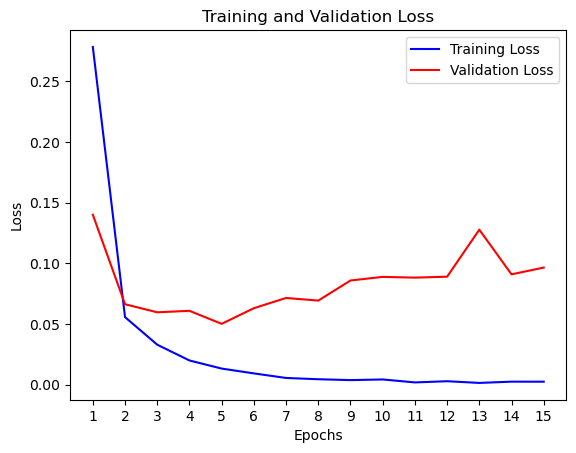

In [28]:
import matplotlib.pyplot as plt  # needed to create our plot

history_dict = model2_history.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

Explanation
In the initial training with 64 filters and a 2x2 filter size, the total and trainable parameters were as follows: Total params: 10,57,642 and Trainable params: 10,57,642. After modifying the filter sizes within the layers, the new values for total and trainable parameters are now: Total params: 28,85,642and Trainable params28,85,642. Notably, these parameter adjustments have led to an enhancement in training accuracy, as evident in the visualizations provided above.

In [48]:
entire_train_data = train_data[:]
entire_train_labels = train_labels[:]

print(entire_train_data.shape)
print(entire_train_labels.shape)

(60000, 28, 28)
(60000,)


In [49]:
full_train_data = entire_train_data / 255.

In [50]:
entire_train_data = np.expand_dims(full_train_data, axis=3)

entire_train_data.shape

(60000, 28, 28, 1)

In [51]:
from tensorflow.keras.utils import to_categorical

entire_train_labels = to_categorical(entire_train_labels)

entire_train_labels.shape

(60000, 10)

In [52]:
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model2_history = model2.fit(entire_train_data,
                    entire_train_labels,
                    epochs=10,
                    batch_size=256,
                    verbose=1)

Epoch 1/10
235/235 [==============================] - 150s 617ms/step - loss: 0.0090 - accuracy: 0.9977
Epoch 2/10
235/235 [==============================] - 144s 613ms/step - loss: 0.0036 - accuracy: 0.9988
Epoch 3/10
235/235 [==============================] - 138s 587ms/step - loss: 0.0023 - accuracy: 0.9993
Epoch 4/10
235/235 [==============================] - 117s 498ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 5/10
235/235 [==============================] - 114s 483ms/step - loss: 7.6783e-04 - accuracy: 0.9998
Epoch 6/10
235/235 [==============================] - 116s 493ms/step - loss: 5.7536e-04 - accuracy: 0.9998
Epoch 7/10
235/235 [==============================] - 116s 495ms/step - loss: 4.4568e-04 - accuracy: 0.9998
Epoch 8/10
235/235 [==============================] - 117s 496ms/step - loss: 9.2011e-04 - accuracy: 0.9998
Epoch 9/10
235/235 [==============================] - 117s 498ms/step - loss: 3.7717e-05 - accuracy: 1.0000
Epoch 10/10
235/235 [=======================

Explanation
We've noticed that when we reach the 10-epoch mark, the model is approaching a state of potential overfitting. To address this, our next step is to introduce a callback mechanism to monitor the occurrence of early stopping at a specific epoch.

### Exercise: Early Stopping with Callbacks

Now try to implement early stopping using the Keras [callback](https://keras.io/api/callbacks/early_stopping/) functionality. In this case, you will need to use the validation data, because you want the early stopping to occur as a result of Keras monitoring the validation loss.

In [53]:
model4 = Sequential([
    Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=1,
           padding='same',
           activation='relu',
           input_shape=(28, 28, 1)),
    Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=2,
           padding='valid',
           activation='relu'),
    Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=1,
           padding='same',
          activation='relu'),
    Conv2D(filters=128,
           kernel_size=(3, 3),
           strides=1,
           padding='valid',
           activation='relu'),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [54]:
model4.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In [56]:
model4_history = model4.fit(partial_train_data,
                    partial_train_labels,
                    epochs=15,
                    batch_size=256,
                    callbacks=[callback],
                    validation_data=(val_data, val_labels),
                    verbose=1)

Epoch 1/15
196/196 [==============================] - 72s 361ms/step - loss: 0.2920 - accuracy: 0.9096 - val_loss: 0.0720 - val_accuracy: 0.9808
Epoch 2/15
196/196 [==============================] - 69s 353ms/step - loss: 0.0506 - accuracy: 0.9841 - val_loss: 0.0538 - val_accuracy: 0.9842
Epoch 3/15
196/196 [==============================] - 69s 353ms/step - loss: 0.0303 - accuracy: 0.9907 - val_loss: 0.0553 - val_accuracy: 0.9857
Epoch 4/15
196/196 [==============================] - 70s 355ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0474 - val_accuracy: 0.9874
Epoch 5/15
196/196 [==============================] - 69s 352ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.0459 - val_accuracy: 0.9886
Epoch 6/15
196/196 [==============================] - 70s 356ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.0796 - val_accuracy: 0.9819
Epoch 7/15
196/196 [==============================] - 71s 361ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.0566 - val_ac

Explanation
we see that the early stopping has been implemented by the 11th epoch. this means that the early stopping model has been implemented where the values start repeating and the model might overfit beyond this point.